In [1]:
#Importing necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#Load the datasets
train = pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Assignment_Train.csv')

In [3]:
test = pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Assignment_Test.csv')

### Exploratory Data Analysis

In [4]:
print("Training Data Overview:")
train.head()

Training Data Overview:


,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [5]:
print("\nTest Data Overview:")
test.head()


Test Data Overview:


,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train.shape
#train data consist of 10000 rows and 55 columns

(10000, 55)

In [8]:
test.shape
#test data consist of 10000 rows and 55 columns

(2000, 55)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

In [11]:
#descriptional analysis
train.describe(include='all')

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
count,10000.000000,10000,9999,9146,10000,2855,9319,1.000000e+04,10000,5703,10000,9996,4892.000000,4892,10000.000000,1.000000e+04,10000,10000,10000,5106,10000,1.000000e+04,10000.000000,6688,5002,4990,5002,8947,10000,7213,7211,1.0,8084.000000,8052.000000,8168.000000,8224.00000,8225.000000,3370.000000,1573.000000,8171.000000,410.000000,8128.000000,2.0,8243.000000,1.0,8221.000000,8215.000000,8057.000000,1573.000000,9.0,8218.000000,9996.000000,9996.000000,9994,10000
unique,NaN,29,542,24,4463,1264,3101,NaN,1,267,1,2412,NaN,13,NaN,NaN,17,267,6349,2,2,NaN,NaN,12,2,3694,4,7317,8964,40,6693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,07/11/22,NOIDA-SF,UTTAR PRADESH,MOHD,KUMAR,SINGH,NaN,NO,752,True,DHANSRI MOTOCORP ECOTECH,NaN,MCECA,NaN,NaN,HERO MOTORS,ACTIVA 6G DLX BSVI,NULL@GMAIL.COM,Married,Male,NaN,NaN,Self/Spouse Owned,SELF-EMPLOYED,agriculture,SELF-EMPLOYED,-,AMIT KUMAR,YBL,SUNIL KUMAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,APPROVED
freq,NaN,505,306,1981,202,514,874,NaN,10000,105,10000,75,NaN,1821,NaN,NaN,3618,706,934,3833,8408,NaN,NaN,2273,3472,388,3473,98,17,1451,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4599,6677
mean,102936.459100,NaN,NaN,NaN,NaN,NaN,NaN,8.630041e+09,NaN,NaN,NaN,NaN,97612.518397,NaN,150660.758500,9.179673e+04,NaN,NaN,NaN,NaN,NaN,9.813396e+06,31.796100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.486517,0.149652,0.748408,0.06323,0.986991,0.913353,0.092181,0.050667,0.448780,0.149852,0.0,0.820090,0.0,0.017516,0.147657,0.250838,0.854418,0.0,0.000608,1652.937975,55.645558,NaN,NaN
std,37830.984431,NaN,NaN,NaN,NaN,NaN,NaN,1.077717e+09,NaN,NaN,NaN,NaN,16745.027041,NaN,20847.995017,2.700018e+04,NaN,NaN,NaN,NaN,NaN,8.930654e+06,11.202075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499849,0.356752,0.433954,0.24339,0.113320,0.281359,0.289373,0.219330,0.497977,0.356949,0.0,0.384136,NaN,0.131192,0.354781,0.433522,0.352799,0.0,0.024660,984.114248,42.100616,NaN,NaN
min,49849.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000042e+09,NaN,NaN,NaN,NaN,51873.000000,NaN,124587.000000,1.040000e+04,NaN,NaN,NaN,NaN,NaN,1.011943e+06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,-1.000000,NaN,NaN
25%,79953.750000,NaN,NaN,NaN,NaN,NaN,NaN,7.894858e+09,NaN,NaN,NaN,NaN,88425.500000,NaN,139542.000000,8.000000e+04,NaN,NaN,NaN,NaN,NaN,1.012000e+06,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,809.000000,-1.000000,NaN,NaN
50%,94631.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.867377e+09,NaN,NaN,NaN,NaN,94400.000000,NaN,143238.000000,9.000000e+04,NaN,Na

In [12]:
test.describe(include='all')

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
count,2.000000e+03,2000.000000,2000,2000,1828,2000,595,1869,2.000000e+03,2000,1158,2000,2000,978.000000,978,2000.000000,2.000000e+03,2000,2000,2000,1019,2000,2.000000e+03,2000.00000,1365,1006,1005,1006,1791,2000,1446,1445,0.0,1883.000000,1977.000000,1955.000000,1977.000000,1977.000000,612.000000,262.000000,1962.000000,43.000000,1971.000000,0.0,1975.000000,0.0,1974.000000,1974.000000,1936.000000,262.000000,0.0,1977.000000,2000.000000,2000.000000,1999
unique,NaN,NaN,29,406,24,1292,364,882,NaN,1,224,1,1145,NaN,12,NaN,NaN,16,192,1440,2,2,NaN,NaN,7,2,799,4,1634,1928,28,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,07/04/22,NOIDA-SF,UTTAR PRADESH,MOHD,KUMAR,SINGH,NaN,NO,546,True,DHANSRI MOTOCORP ECOTECH,NaN,MCECA,NaN,NaN,HERO MOTORS,ACTIVA 6G DLX BSVI,NULL@GMAIL.COM,Married,Male,NaN,NaN,Self/Spouse Owned,SELF-EMPLOYED,agriculture,SELF-EMPLOYED,-,RAJ KUMAR,YBL,AJAY KUMAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,NaN,NaN,97,61,416,39,97,187,NaN,2000,22,2000,20,NaN,373,NaN,NaN,745,149,180,764,1672,NaN,NaN,477,708,74,708,32,5,280,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1129
mean,1.130746e+18,104662.633000,NaN,NaN,NaN,NaN,NaN,NaN,8.615985e+09,NaN,NaN,NaN,NaN,97679.605317,NaN,151598.707000,9.372890e+04,NaN,NaN,NaN,NaN,NaN,9.897133e+06,32.35800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468401,0.137582,0.743734,0.060698,0.999494,0.952614,0.083969,0.043323,0.697674,0.150685,NaN,0.822278,NaN,0.016717,0.145897,0.246384,0.797710,NaN,0.001012,1647.472000,27.881515,NaN
std,6.679230e+17,38583.383585,NaN,NaN,NaN,NaN,NaN,NaN,1.090403e+09,NaN,NaN,NaN,NaN,16353.421097,NaN,21615.502147,4.728632e+04,NaN,NaN,NaN,NaN,NaN,9.112755e+06,11.00838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499133,0.344548,0.436682,0.238836,0.022490,0.212636,0.277873,0.203635,0.464701,0.357832,NaN,0.382375,NaN,0.128243,0.353092,0.431016,0.402476,NaN,0.031798,1021.897243,40.455908,NaN
min,5.503943e+11,49849.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000084e+09,NaN,NaN,NaN,NaN,53249.000000,NaN,124587.000000,1.004100e+04,NaN,NaN,NaN,NaN,NaN,1.011960e+06,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,-1.000000,-1.000000,NaN
25%,5.377231e+17,81981.250000,NaN,NaN,NaN,NaN,NaN,NaN,7.858379e+09,NaN,NaN,NaN,NaN,88939.500000,NaN,139541.000000,8.000000e+04,NaN,NaN,NaN,NaN,NaN,1.012000e+06,25.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,792.000000,-1.000000,NaN
50%,1.108497e+18,94964.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.859302e+09,NaN,NaN,NaN,NaN,94535.500000,NaN,143240.000000,9.000000e+04,NaN,NaN,NaN,N

In [13]:
#columns
train.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       

In [14]:
test.columns

Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',


In [15]:
# checking frequencies of columns
for c in train.columns:
    print(c)
    print(train[c].value_counts())
    print('\n')

DEALER ID
112006    75
88282     51
77503     39
79245     38
94718     37
          ..
64913      1
75434      1
55335      1
199676     1
105111     1
Name: DEALER ID, Length: 2416, dtype: int64


APPLICATION LOGIN DATE
07/11/22      505
07/13/2022    469
07/18/2022    468
07/04/22      438
07/25/2022    414
07/15/2022    409
07/07/22      400
07/08/22      374
07/14/2022    373
07/22/2022    370
07/19/2022    364
07/06/22      361
07/12/22      359
07/21/2022    358
07/27/2022    355
07/20/2022    354
07/26/2022    351
07/29/2022    349
07/05/22      347
07/28/2022    337
07/09/22      282
07/30/2022    282
07/31/2022    262
07/17/2022    254
07/16/2022    243
07/03/22      241
07/10/22      233
07/23/2022    231
07/24/2022    217
Name: APPLICATION LOGIN DATE, dtype: int64


HDB BRANCH NAME
NOIDA-SF          306
DELHI-SF          239
HYDERABAD-SF      210
DEHRADUN-SF       200
BANGALORE-SF      147
                 ... 
DHUPGURI-SF         1
PALUR-SF            1
RAJNANDGAON-SF     

In [16]:
# checking frequencies of columns
for c in test.columns:
    print(c)
    print(test[c].value_counts())
    print('\n')

UID
1844045271814558464    1
450695067030745344     1
1544474222136286976    1
1283172132275674624    1
1725663253084110080    1
                      ..
581366580518245888     1
1651953500779361280    1
1001736662658018048    1
1222288794552098816    1
1680321200653072640    1
Name: UID, Length: 2000, dtype: int64


DEALER ID
112006    20
88282     18
73665     10
97418     10
94065     10
          ..
74368      1
113386     1
108147     1
55971      1
84909      1
Name: DEALER ID, Length: 1145, dtype: int64


APPLICATION LOGIN DATE
07/04/22      97
07/06/22      94
07/18/2022    93
07/07/22      90
07/14/2022    90
07/11/22      88
07/25/2022    86
07/22/2022    85
07/13/2022    82
07/15/2022    82
07/08/22      81
07/28/2022    77
07/26/2022    70
07/29/2022    70
07/21/2022    67
07/27/2022    66
07/12/22      66
07/20/2022    66
07/05/22      62
07/19/2022    60
07/31/2022    52
07/03/22      50
07/30/2022    50
07/17/2022    49
07/16/2022    48
07/24/2022    47
07/09/22      47


##### Visualizing  low frequency character columns in train and test data respectively

<Axes: xlabel='Application Status', ylabel='count'>

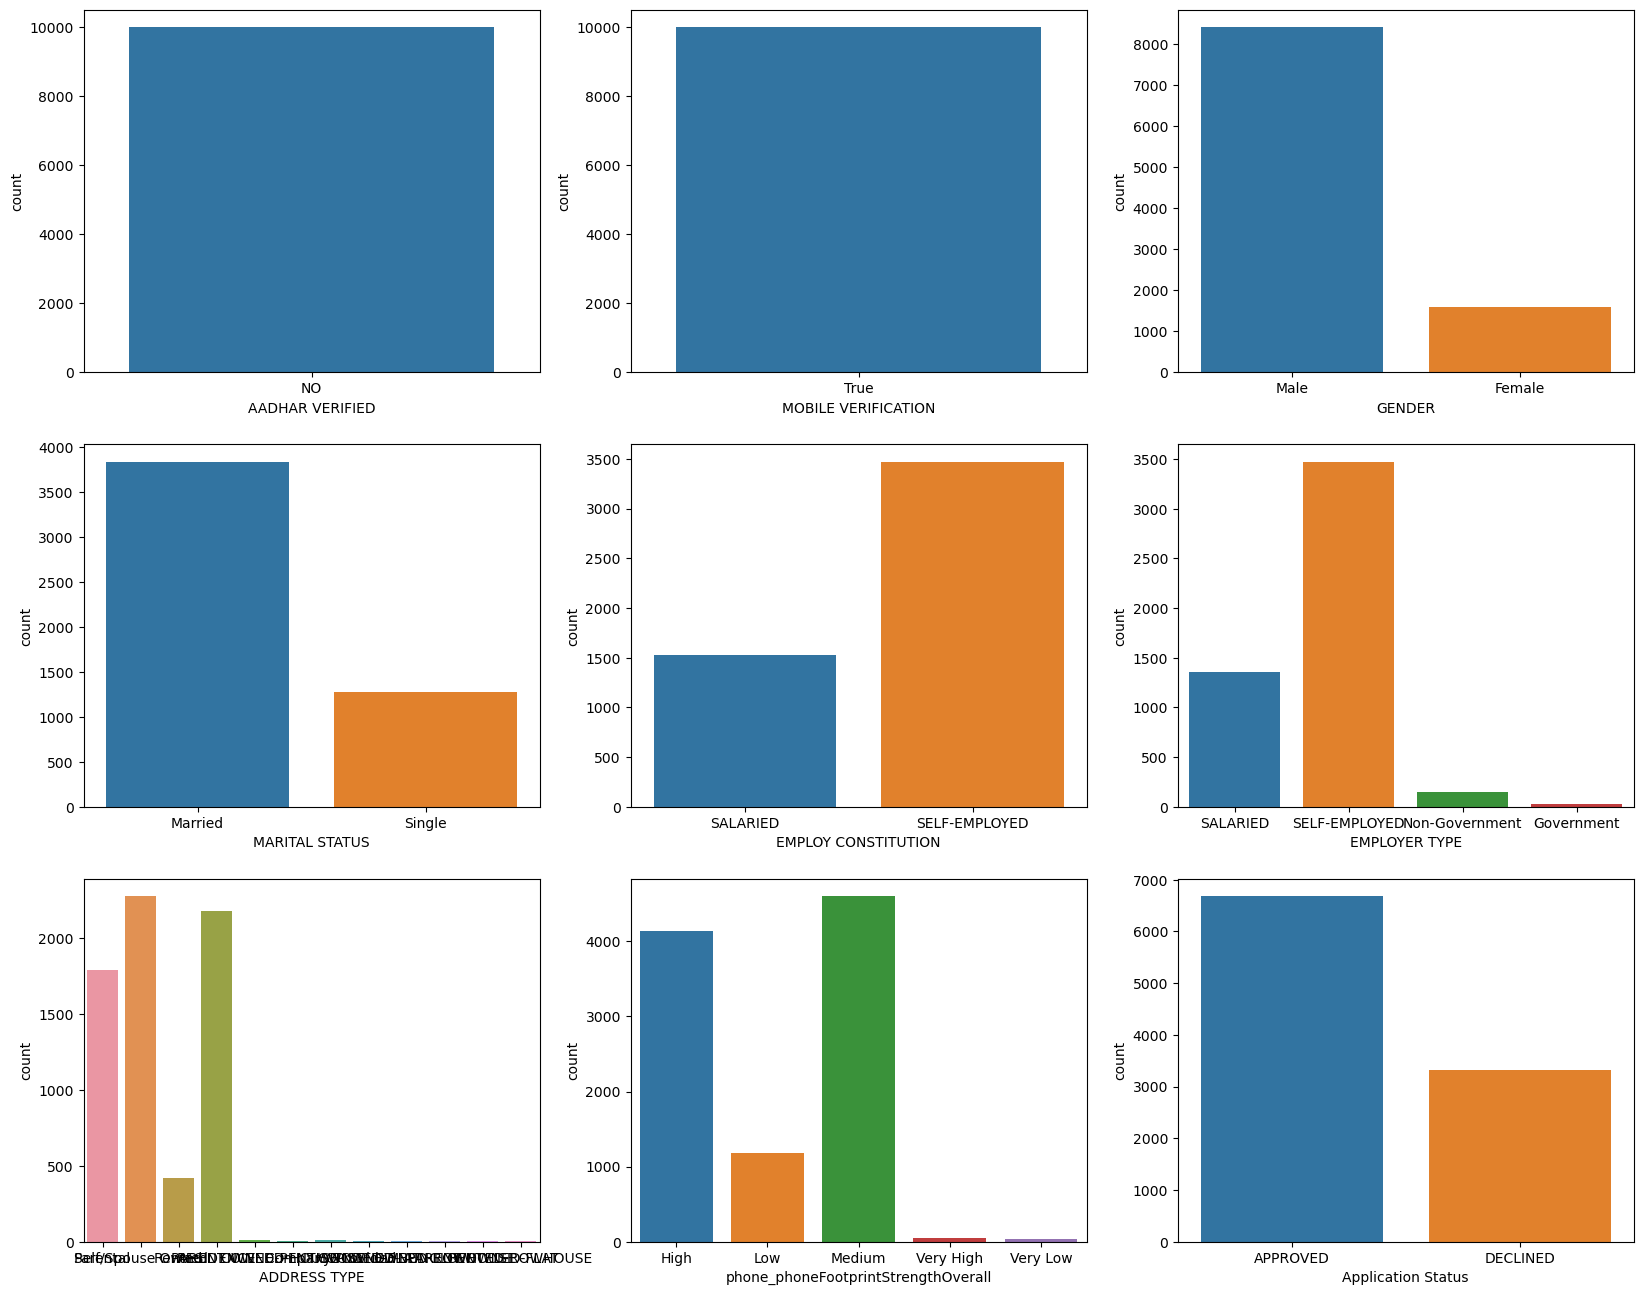

In [17]:
fig, ax = plt.subplots(3,3, figsize=(20,16))

sns.countplot(x='AADHAR VERIFIED', data=train, ax=ax[0][0])
sns.countplot(x='MOBILE VERIFICATION', data=train, ax=ax[0][1])
sns.countplot(x='GENDER', data=train, ax=ax[0][2])
sns.countplot(x='MARITAL STATUS', data=train, ax=ax[1][0])
sns.countplot(x='EMPLOY CONSTITUTION', data=train, ax=ax[1][1])
sns.countplot(x='EMPLOYER TYPE', data=train, ax=ax[1][2])
sns.countplot(x='ADDRESS TYPE', data=train, ax=ax[2][0])
sns.countplot(x='phone_phoneFootprintStrengthOverall', data=train, ax=ax[2][1])
sns.countplot(x='Application Status', data=train, ax=ax[2][2])

<Axes: xlabel='phone_phoneFootprintStrengthOverall', ylabel='count'>

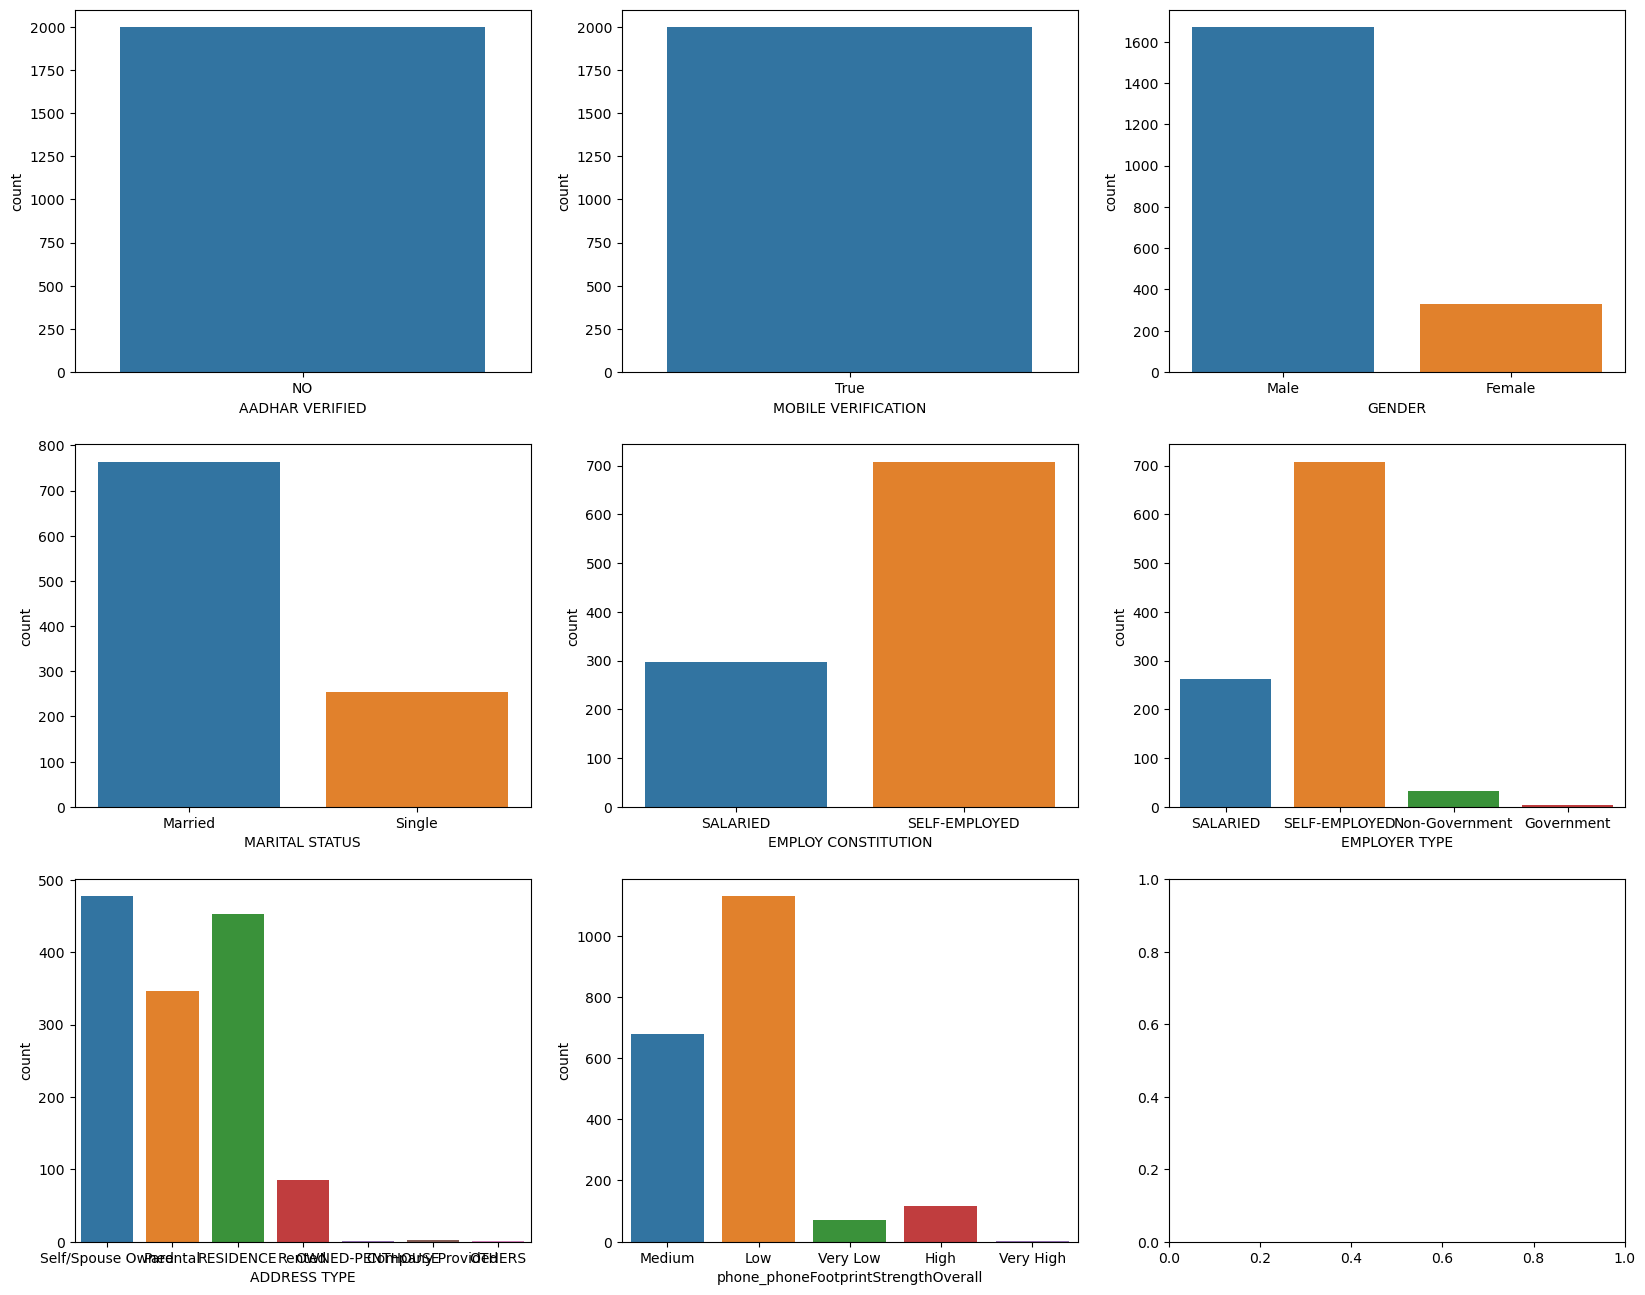

In [18]:
fig, ax = plt.subplots(3,3, figsize=(20,16))

sns.countplot(x='AADHAR VERIFIED', data=test, ax=ax[0][0])
sns.countplot(x='MOBILE VERIFICATION', data=test, ax=ax[0][1])
sns.countplot(x='GENDER', data=test, ax=ax[0][2])
sns.countplot(x='MARITAL STATUS', data=test, ax=ax[1][0])
sns.countplot(x='EMPLOY CONSTITUTION', data=test, ax=ax[1][1])
sns.countplot(x='EMPLOYER TYPE', data=test, ax=ax[1][2])
sns.countplot(x='ADDRESS TYPE', data=test, ax=ax[2][0])
sns.countplot(x='phone_phoneFootprintStrengthOverall', data=test, ax=ax[2][1])

<Axes: xlabel='EMPLOY CONSTITUTION', ylabel='count'>

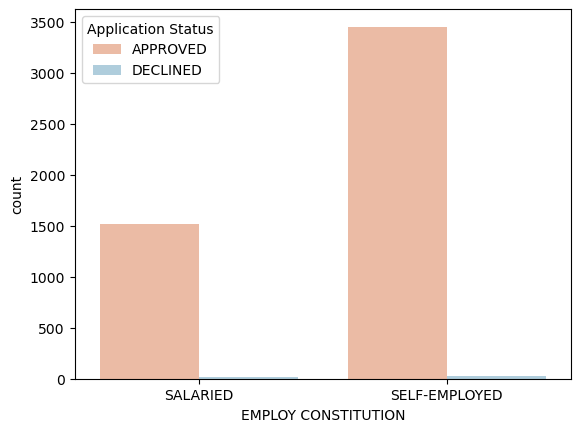

In [19]:
sns.countplot(x="EMPLOY CONSTITUTION", hue = "Application Status", data =train, palette="RdBu")

##### self employed employees has more number of approved loan 

<Axes: xlabel='EMPLOYER TYPE', ylabel='count'>

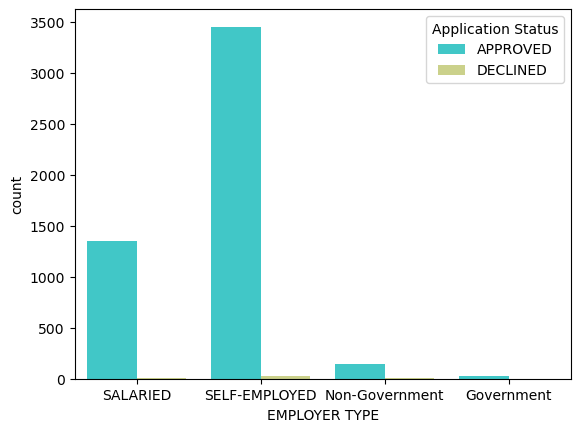

In [20]:
sns.countplot(x="EMPLOYER TYPE", hue = "Application Status", data =train, palette="rainbow")

##### 'Salaried' and 'Self-employed' more likely to get approved for the two wheeler loan than Government or non-government employess

<Axes: xlabel='GENDER', ylabel='count'>

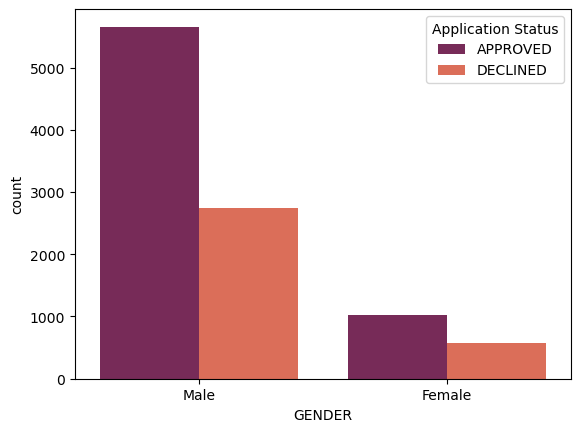

In [21]:
sns.countplot(x="GENDER", hue = "Application Status", data =train, palette="rocket")

###### Loan approval chances are high for males that is for every 3 males applying 2 of them get 'Approved' but for females the chances are comparitively low

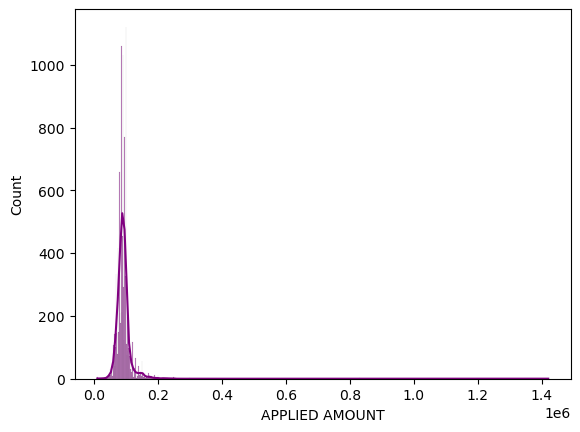

In [22]:
sns.histplot(data=train, x="APPLIED AMOUNT", kde=True, color='purple');

##### most applied amount lies between 80000-100000

In [23]:
#check for duplicated values
train[train.duplicated]

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
3518,107700,07/31/2022,DELHI-SF,DELHI,SHOBHA,NaN,DEVI,9654941564,NO,712,True,K K AUTOMOBILES TILANG PUR,NaN,NaN,134898,88500,TVS MOTOR CO,JUPITER BSVI,SHOBHA2000@GMAIL.COM,NaN,Female,15072000,22,NaN,NaN,NaN,NaN,SHOBHA DEVI,SHOBHA DEVI,IBL,SHOBHA DEVI,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,1503.0,100.000000,Medium,APPROVED
5926,91969,07/04/22,HALDWANI-SF,UTTARAKHAND,MOHD,NaN,RAFAT,9639208194,NO,NaN,True,SHRI BALAJI MOTORS BAREILLY ROAD,NaN,NaN,143240,100000,HONDA MOTORS,ACTIVA 6G DLX BSVI,NULL78@GMAIL.COM,NaN,Male,1011981,41,RESIDENCE,NaN,NaN,NaN,MOHD RAFAT,MOHD RAFAT,OKICICI,MOHD RAFAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0,100.000000,Low,DECLINED
7273,91583,07/08/22,DELHI SOUTH-SF,DELHI,KRISHNA,NANDAN,KUMAR,9534011151,NO,NaN,True,OM SONS PROJECTS P L ADCHINI,NaN,NaN,129101,99000,HONDA MOTORS,SP 125 DISC BS VI,NULL@GMAIL.COM,NaN,Male,10121993,28,RESIDENCE,NaN,NaN,NaN,KRISHNA NANDAN KUMAR,KRISHNA NANDAN KUMAR,OKHDFCBANK,KRISHNA NANDAN KUMAR,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,1.0,1.0,NaN,NaN,0.0,2396.0,90.000000,High,DECLINED
8417,105707,07/31/2022,ROORKEE-SF,UTTARAKHAND,SONU,NaN,KUMAR,7248847715,NO,NaN,True,UP AUTOMOBILES S 23 24 AVAS VIKAS,NaN,NaN,140212,90000,HERO MOTORS,SPLENDOR PLUS SELF START DRUM BSVI,NULL@GMAIL.COM,NaN,Male,25021984,38,NaN,NaN,NaN,NaN,NaN,SONU KUMAR,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,-1.0,-1.000000,Low,DECLINED
8791,110588,07/28/2022,INDAPUR-SF,MAHARASHTRA,SAMBHAJI,TUKARAM,BHONG,9890577452,NO,770,True,SAI MOTORS TEMBHURNI AKLUJ CHOUK,NaN,NaN,149668,99000,BAJAJ AUTO INDIA,PULSAR 125 SPLIT SEAT BSVI,SAGARPGAIKWAD28@GMAIL.COM,NaN,Male,1031973,49,NaN,NaN,NaN,NaN,-,SAMBHAJI TUKARAM BHONG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,4117.0,-1.000000,Medium,DECLINED
9014,107187,07/12/22,DHAMPUR-SF,NaN,ABDUL,NaN,KADIR,6397903454,NO,NaN,True,SAMRAT ENTERPRISES SUGAR MILL,NaN,NaN,133253,106000,SUZUKI MOTORCYCLE,NEW ACCESS 125 DRUM CBS BSVI,KADIR454@GMAIL.COM,NaN,Male,1011998,24,RESIDENCE,NaN,NaN,NaN,-,ABDUL KADIR,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,1988.0,-1.000000,Medium,DECLINED
9271,87438,07/28/2022,JORHAT-SF,ASSAM,TILOK,NaN,BASFOR,6003587172,NO,734,True,GDCL AGENCIES P L SONARI,NaN,NaN,185293,100000,SUZUKI MOTORCYCLE,AVENIS RACE ED BSVI,NULLI@GMAIL.COM,NaN,Male,2081991,30,NaN,NaN,NaN,NaN,TILOK BASFOR,TILOK BASFOR,OKSBI,Sumit Basfor,NaN,1.0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,668.0,63.492063,High,DECLINED
9278,107519,07/29/2022,LALITPUR-SF,UTTAR PRADESH,RAMJI,NaN,LODHI,9116257288,NO,660,True,SANJAY AUTOMOBILES JHANSI ROAD,NaN,NaN,160892,150000,TVS MOTOR CO,SPORT KICK START SPOKE BSVI,RAMJI@GMAIL.COM,NaN,Male,1011984,38,NaN,NaN,NaN,NaN,RAMJI LODHI,RAMJI LODHI

###### train dataset contains duplicated values(9 rows),it may cause false prediction so we should remove it

In [24]:
train=train.drop_duplicates()
train[train.duplicated]

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status


In [25]:
test[test.duplicated]
#test data has no duplicated values

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall


##### While plotting countplots came to know that some of the columns in our train and test data are constants(containing only one value),we can remove them because they may not provide valuable information and by removing them may increase accuracy score

In [26]:
constant_columns = [col for col in train.columns if train[col].nunique() == 1]
constant_columns

['AADHAR VERIFIED',
 'MOBILE VERIFICATION',
 'Phone Social Premium.a23games',
 'Phone Social Premium.my11',
 'Phone Social Premium.rummycircle',
 'Phone Social Premium.yatra']

In [27]:
constant_columns = [col for col in test.columns if test[col].nunique() == 1]
constant_columns

['AADHAR VERIFIED', 'MOBILE VERIFICATION']

In [28]:
train=train.drop(columns=['AADHAR VERIFIED','MOBILE VERIFICATION'],axis=0)
test=test.drop(columns=['AADHAR VERIFIED','MOBILE VERIFICATION'],axis=0)

In [29]:
train.shape , test.shape

((9991, 53), (2000, 53))

## Data Preprocessing

### Checking for null values

In [30]:
train.isna().sum()   #train data has null values

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        853
FIRST NAME                                0
MIDDLE NAME                            7138
LAST NAME                               681
mobile                                    0
Cibil Score                            4292
DEALER NAME                               4
TOTAL ASSET COST                       5099
ASSET CTG                              5099
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                         4885
GENDER                                    0
DOB                                       0
AGE                                       0
ADDRESS TYPE                           3307
EMPLOY CONSTITUTION             

In [31]:
test.isna().sum()   #test data also contains null values

UID                                       0
DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           0
HDB BRANCH STATE                        172
FIRST NAME                                0
MIDDLE NAME                            1405
LAST NAME                               131
mobile                                    0
Cibil Score                             842
DEALER NAME                               0
TOTAL ASSET COST                       1022
ASSET CTG                              1022
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                          981
GENDER                                    0
DOB                                       0
AGE                                       0
ADDRESS TYPE                    

##### we need to work on the null values because keeping them untreated may cause false prediction and there  by reduce models performance

### Preprocessing

In [32]:
def preprocess(df):
    # Convert 'Cibil Score' to numeric, forcing errors to NaN
    df['Cibil Score'] = pd.to_numeric(df['Cibil Score'], errors='coerce')

    # Fill missing categorical values with 'Unknown'
    categorical_df = df.select_dtypes(include=['object']).columns
    df[categorical_df] = df[categorical_df].fillna('Unknown')

    # Fill missing boolean (0/1) values and convert to int
    bool_features = [col for col in df.columns if col.startswith('Phone Social Premium.')]
    for feature in bool_features:
        df[feature] = df[feature].fillna(0).astype(int)

    # Impute missing integer and float values with the mean
    imputer = SimpleImputer(strategy='mean')
    df[df.select_dtypes(include=['int64', 'float64']).columns] = imputer.fit_transform(df.select_dtypes(include=['int64', 'float64']))

In [33]:
preprocess(train)
preprocess(test)

In [34]:
train.isna().sum()

DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
MIDDLE NAME                            0
LAST NAME                              0
mobile                                 0
Cibil Score                            0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME                          0
EMPLOYER TYPE   

In [35]:
train.isna().any().sum()

0

In [36]:
test.isna().sum()

UID                                    0
DEALER ID                              0
APPLICATION LOGIN DATE                 0
HDB BRANCH NAME                        0
HDB BRANCH STATE                       0
FIRST NAME                             0
MIDDLE NAME                            0
LAST NAME                              0
mobile                                 0
Cibil Score                            0
DEALER NAME                            0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
Personal Email Address                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
EMPLOYER NAME   

In [37]:
test.isna().any().sum() , train.isna().any().sum()

(0, 0)

##### we have successfully treated  null values ,data is set for model evaluation

## Feature Engineering

### Label encoding

In [38]:
#Converting categorical values to integer values
label_encoder = LabelEncoder()
categorical_df = train.select_dtypes(include=['object']).columns
for i in categorical_df:
   train[i] = label_encoder.fit_transform(train[i])

categorical_df = test.select_dtypes(include=['object']).columns
for i in categorical_df:
   test[i] = label_encoder.fit_transform(test[i])

In [39]:
train

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989.0,17,140,4,4023,1204,490,9.210574e+09,726.000000,2306,95041.000000,7,139542.0,85000.0,7,215,5716,0,1,1041978.0,44.0,7,0,3421,2,6559,8007,0,5741,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5324.0,67.222222,0,0
1,108975.0,25,397,2,207,1204,1409,8.877987e+09,706.393217,394,97612.518397,13,140208.0,90000.0,6,225,3582,2,1,1011997.0,25.0,12,2,2336,4,387,479,21,651,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1998.0,100.000000,0,0
2,111004.0,12,130,24,239,1204,2898,8.910862e+09,737.000000,917,119436.000000,12,160001.0,75000.0,15,240,1105,1,1,9081999.0,22.0,11,1,2308,3,460,565,35,6335,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.000000,1,0
3,192020.0,1,446,21,76,1204,2684,9.758428e+09,713.000000,1069,87000.000000,4,160832.0,78500.0,6,228,119,1,1,3071998.0,24.0,7,1,2485,3,122,152,22,596,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1998.0,72.777778,0,0
4,55095.0,12,340,5,2689,404,127,9.687028e+09,669.000000,522,97612.518397,13,174641.0,70000.0,7,64,3711,2,1,5071989.0,33.0,12,2,2336,4,1988,5125,11,1655,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1998.0,68.095238,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,105101.0,8,163,21,105,1204,1916,8.400645e+09,706.393217,646,88970.000000,4,160832.0,87000.0,6,228,177,0,1,12042000.0,22.0,7,0,723,2,158,211,20,119,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,-1.0,60.576923,2,0
9996,85054.0,1,72,2,4042,594,2102,9.708884e+09,706.393217,1562,120000.000000,7,183085.0,90000.0,15,201,5771,0,1,2101971.0,50.0,11,1,1816,3,6643,8133,39,2962,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1998.0,71.078431,0,0
9997,53710.0,7,317,15,3425,1204,2,9.888532e+09,706.393217,1906,89929.000000,11,143240.0,89000.0,7,12,4862,0,1,1011983.0,39.0,10,1,2153,3,5594,6819,21,5125,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1988.0,100.000000,2,0
9998,89240.0,26,337,21,3425,1204,2684,8.923338e+09,706.393217,1951,89340.000000,4,160832.0,85000.0,6,228,3506,0,1,19121970.0,51.0,11,1,1932,3,5604,6851,35,6335,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1096.0,-1.000000,1,0


In [40]:
test

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1.844045e+18,105615.0,9,166,23,1238,113,104,7.019760e+09,757.000000,856,95352.000000,10,143241.0,88000.0,6,9,818,0,1,10081965.0,56.0,6,0,239,2,1570,1843,14,333,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,676.0,100.000000,2
1,1.840349e+18,91593.0,11,344,11,1078,343,146,7.697885e+09,750.000000,1140,75371.000000,9,166536.0,75000.0,14,183,1194,0,1,1011980.0,42.0,3,1,659,3,1377,1618,26,1341,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,897.0,-1.000000,1
2,1.488103e+18,74152.0,4,237,21,574,343,853,8.840080e+09,710.000000,401,94983.000000,10,134123.0,93000.0,6,6,586,1,1,28091996.0,25.0,6,1,369,3,678,787,4,528,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,839.0,100.000000,2
3,5.555299e+17,110164.0,10,216,10,266,268,668,8.089277e+09,695.000000,304,97679.605317,12,143627.0,95000.0,15,143,279,2,1,14041988.0,34.0,7,2,517,4,325,383,26,1341,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2050.0,-1.000000,1
4,1.010213e+18,113037.0,5,305,13,44,343,592,9.337512e+09,706.444541,507,90277.000000,3,143948.0,83000.0,5,107,58,1,1,1011998.0,24.0,3,1,215,3,1548,74,28,33,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.0,-1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.595862e+18,110697.0,22,237,23,768,162,842,8.542832e+09,734.000000,1031,89700.000000,3,138469.0,75000.0,14,166,846,1,1,17011994.0,28.0,3,1,330,3,1013,1113,28,719,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1998.0,81.363636,2
1996,8.798897e+17,107225.0,18,353,11,866,343,551,8.959152e+09,727.000000,300,98000.000000,3,180580.0,80000.0,2,115,978,0,1,1011981.0,41.0,6,1,551,3,1548,1301,8,1037,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,277.0,-1.000000,2
1997,2.429095e+17,92743.0,16,282,21,988,343,598,8.130179e+09,675.000000,526,97679.605317,12,143233.0,70000.0,14,164,810,2,1,1011979.0,43.0,7,2,517,4,1286,1501,17,1284,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,540.0,18.695652,0
1998,1.387256e+17,193608.0,4,96,2,630,343,557,7.070956e+09,741.000000,252,87101.000000,3,140208.0,80000.0,5,159,651,0,1,1011978.0,44.0,6,1,142,3,787,904,26,1341,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1671.0,-1.000000,1


#### no categorical values present in train and test data

### Model fitting

In [41]:
# Dropping target and redundant features from the training and test set
X = train.drop(columns=['Application Status', 'DEALER ID',  'APPLICATION LOGIN DATE'])
y = train['Application Status']
X_test = test.drop(columns=['DEALER ID', 'UID', 'APPLICATION LOGIN DATE'])

In [42]:
X

,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,140,4,4023,1204,490,9.210574e+09,726.000000,2306,95041.000000,7,139542.0,85000.0,7,215,5716,0,1,1041978.0,44.0,7,0,3421,2,6559,8007,0,5741,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,5324.0,67.222222,0
1,397,2,207,1204,1409,8.877987e+09,706.393217,394,97612.518397,13,140208.0,90000.0,6,225,3582,2,1,1011997.0,25.0,12,2,2336,4,387,479,21,651,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1998.0,100.000000,0
2,130,24,239,1204,2898,8.910862e+09,737.000000,917,119436.000000,12,160001.0,75000.0,15,240,1105,1,1,9081999.0,22.0,11,1,2308,3,460,565,35,6335,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.000000,1
3,446,21,76,1204,2684,9.758428e+09,713.000000,1069,87000.000000,4,160832.0,78500.0,6,228,119,1,1,3071998.0,24.0,7,1,2485,3,122,152,22,596,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1998.0,72.777778,0
4,340,5,2689,404,127,9.687028e+09,669.000000,522,97612.518397,13,174641.0,70000.0,7,64,3711,2,1,5071989.0,33.0,12,2,2336,4,1988,5125,11,1655,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1998.0,68.095238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,163,21,105,1204,1916,8.400645e+09,706.393217,646,88970.000000,4,160832.0,87000.0,6,228,177,0,1,12042000.0,22.0,7,0,723,2,158,211,20,119,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,-1.0,60.576923,2
9996,72,2,4042,594,2102,9.708884e+09,706.393217,1562,120000.000000,7,183085.0,90000.0,15,201,5771,0,1,2101971.0,50.0,11,1,1816,3,6643,8133,39,2962,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1998.0,71.078431,0
9997,317,15,3425,1204,2,9.888532e+09,706.393217,1906,89929.000000,11,143240.0,89000.0,7,12,4862,0,1,1011983.0,39.0,10,1,2153,3,5594,6819,21,5125,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1988.0,100.000000,2
9998,337,21,3425,1204,2684,8.923338e+09,706.393217,1951,89340.000000,4,160832.0,85000.0,6,228,3506,0,1,19121970.0,51.0,11,1,1932,3,5604,6851,35,6335,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1096.0,-1.000000,1


In [43]:
y

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Application Status, Length: 9991, dtype: int32

In [44]:
X_test

,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,Personal Email Address,MARITAL STATUS,GENDER,DOB,AGE,ADDRESS TYPE,EMPLOY CONSTITUTION,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.housing,Phone Social Premium.indiamart,Phone Social Premium.instagram,Phone Social Premium.isWABusiness,Phone Social Premium.jeevansaathi,Phone Social Premium.jiomart,Phone Social Premium.microsoft,Phone Social Premium.my11,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,166,23,1238,113,104,7.019760e+09,757.000000,856,95352.000000,10,143241.0,88000.0,6,9,818,0,1,10081965.0,56.0,6,0,239,2,1570,1843,14,333,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,676.0,100.000000,2
1,344,11,1078,343,146,7.697885e+09,750.000000,1140,75371.000000,9,166536.0,75000.0,14,183,1194,0,1,1011980.0,42.0,3,1,659,3,1377,1618,26,1341,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,897.0,-1.000000,1
2,237,21,574,343,853,8.840080e+09,710.000000,401,94983.000000,10,134123.0,93000.0,6,6,586,1,1,28091996.0,25.0,6,1,369,3,678,787,4,528,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,839.0,100.000000,2
3,216,10,266,268,668,8.089277e+09,695.000000,304,97679.605317,12,143627.0,95000.0,15,143,279,2,1,14041988.0,34.0,7,2,517,4,325,383,26,1341,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2050.0,-1.000000,1
4,305,13,44,343,592,9.337512e+09,706.444541,507,90277.000000,3,143948.0,83000.0,5,107,58,1,1,1011998.0,24.0,3,1,215,3,1548,74,28,33,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,-1.0,-1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,237,23,768,162,842,8.542832e+09,734.000000,1031,89700.000000,3,138469.0,75000.0,14,166,846,1,1,17011994.0,28.0,3,1,330,3,1013,1113,28,719,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1998.0,81.363636,2
1996,353,11,866,343,551,8.959152e+09,727.000000,300,98000.000000,3,180580.0,80000.0,2,115,978,0,1,1011981.0,41.0,6,1,551,3,1548,1301,8,1037,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,277.0,-1.000000,2
1997,282,21,988,343,598,8.130179e+09,675.000000,526,97679.605317,12,143233.0,70000.0,14,164,810,2,1,1011979.0,43.0,7,2,517,4,1286,1501,17,1284,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,540.0,18.695652,0
1998,96,2,630,343,557,7.070956e+09,741.000000,252,87101.000000,3,140208.0,80000.0,5,159,651,0,1,1011978.0,44.0,6,1,142,3,787,904,26,1341,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1671.0,-1.000000,1


In [45]:
# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)

# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_val)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [47]:
models = {
    "Logistic Regression": y_pred_log_reg,
    "Support Vector Machine": y_pred_svm,
    "K-Nearest Neighbors": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rf
}

for model_name, y_pred in models.items():
    print(f"{model_name} Accuracy: {accuracy_score(y_val, y_pred)}")
for model_name, y_pred in models.items():
    print(f"{model_name} Classification Report:\n", classification_report(y_val, y_pred))
    print("\n" + "*********************************************************" + "\n")

Logistic Regression Accuracy: 0.6643321660830416
Support Vector Machine Accuracy: 0.6643321660830416
K-Nearest Neighbors Accuracy: 0.5982991495747874
Naive Bayes Accuracy: 0.6643321660830416
Random Forest Accuracy: 0.8799399699849925
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80      1328
           1       0.00      0.00      0.00       671

    accuracy                           0.66      1999
   macro avg       0.33      0.50      0.40      1999
weighted avg       0.44      0.66      0.53      1999


*********************************************************

Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80      1328
           1       0.00      0.00      0.00       671

    accuracy                           0.66      1999
   macro avg       0.33      0.50      0.40      1999
weighted avg    

**We notice that Random forest significantly outperforms the other models. Since it is a decision tree-based model, we might want to try a few more tree-based models before concluding our task.**

In [48]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)

# Extra Trees Classifier
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)
y_pred_et = extra_trees.predict(X_val)

In [49]:
# Evaluating Tree-Based Models
tree_based_models = {
    "Decision Tree": y_pred_dt,
    "Extra Trees": y_pred_et
}

for model_name, y_pred in tree_based_models.items():
    print(f"{model_name} Accuracy: {accuracy_score(y_val, y_pred)}")
for model_name, y_pred in tree_based_models.items():
    print(f"{model_name} Classification Report:\n", classification_report(y_val, y_pred))
    print("\n" + "*********************************************************" + "\n")

Decision Tree Accuracy: 0.8519259629814907
Extra Trees Accuracy: 0.8549274637318659
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1328
           1       0.78      0.78      0.78       671

    accuracy                           0.85      1999
   macro avg       0.83      0.83      0.83      1999
weighted avg       0.85      0.85      0.85      1999


*********************************************************

Extra Trees Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      1328
           1       0.74      0.87      0.80       671

    accuracy                           0.85      1999
   macro avg       0.84      0.86      0.84      1999
weighted avg       0.87      0.85      0.86      1999


*********************************************************



#### Random forest model has high accuracy comparing to other models,so we select Random Forest as our prediction model

### Prediction

In [50]:
test_predictions = rf.predict(X_test)
test_predictions.shape
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
result = pd.DataFrame({
    'UID': test['UID'],
    'Prediction':test_predictions
})

result['Prediction'] = result['Prediction'].apply(lambda x: 'APPROVED' if x == 0 else 'DECLINED')
result.to_csv('predictions.csv', index=False)
#print("predictions saved to 'predictions.csv' ")

In [52]:
result['Prediction']

0       APPROVED
1       APPROVED
2       APPROVED
3       APPROVED
4       APPROVED
          ...   
1995    APPROVED
1996    APPROVED
1997    APPROVED
1998    APPROVED
1999    APPROVED
Name: Prediction, Length: 2000, dtype: object

In [53]:
result

,UID,Prediction
0,1.844045e+18,APPROVED
1,1.840349e+18,APPROVED
2,1.488103e+18,APPROVED
3,5.555299e+17,APPROVED
4,1.010213e+18,APPROVED
...,...,...
1995,1.595862e+18,APPROVED
1996,8.798897e+17,APPROVED
1997,2.429095e+17,APPROVED
1998,1.387256e+17,APPROVED


<Axes: xlabel='Prediction', ylabel='count'>

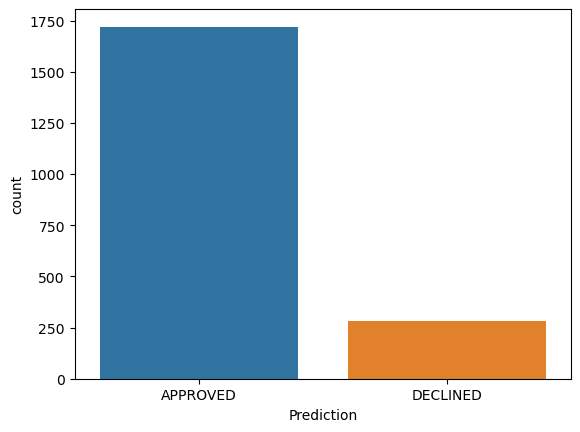

In [54]:
sns.countplot(x='Prediction', data=result)

In [55]:
import os
os.getcwd() 

'C:\\Users\\bivin'